## Preparation

#### Library

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime
from wordvector import reduce_dimension

#### Data

In [3]:
pric = pd.read_csv("sp500.csv",index_col=0)
date = pd.read_csv("dates.csv",index_col=0)

In [4]:
start = time.time()
kvec = pd.read_csv("kvec.csv",index_col=0)
end = time.time()
print("{} seconds".format(round(end-start,2)))

7.03 seconds


In [5]:
start = time.time()
vvec = pd.read_csv("vvec.csv",index_col=0)
end = time.time()
print("{} seconds".format(round(end-start,2)))

274.13 seconds


In [8]:
pric

,AAPL,MSFT,AMZN,NVDA,GOOGL,META,GOOG,TSLA,UNH,LLY,...,VFC,ZION,DVA,RL,SEE,ALK,SEDG,MHK,FOX,NWS
2010/01/04,6.478998,23.474920,6.695000,4.240801,15.684434,NaN,15.610239,NaN,25.685120,23.817673,...,11.866761,10.597576,29.959999,65.103912,17.242455,7.839309,NaN,48.310001,NaN,NaN
2010/01/05,6.490201,23.482500,6.734500,4.302727,15.615365,NaN,15.541497,NaN,25.644392,23.398764,...,12.093167,10.971234,29.705000,67.658249,17.062353,8.268708,NaN,48.119999,NaN,NaN
2010/01/06,6.386963,23.338392,6.612500,4.330249,15.221722,NaN,15.149715,NaN,25.896919,23.571650,...,12.044647,11.925250,29.530001,67.147385,16.733477,8.194519,NaN,47.930000,NaN,NaN
2010/01/07,6.375157,23.095678,6.500000,4.245388,14.867367,NaN,14.797037,NaN,26.890759,23.451967,...,12.277520,13.260881,29.785000,68.440506,16.905739,8.151804,NaN,48.770000,NaN,NaN
2010/01/08,6.417541,23.254965,6.676000,4.254562,15.065566,NaN,14.994298,NaN,26.638233,23.272434,...,12.212836,13.046230,30.500000,68.943405,16.976223,7.989937,NaN,49.639999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/11/15,188.009995,369.670013,143.199997,488.880005,134.619995,332.709991,136.380005,242.839996,538.409973,588.539978,...,17.770000,36.080002,94.470001,123.919998,33.570000,37.009998,80.040001,86.330002,28.459999,21.889999
2023/11/16,189.710007,376.170013,142.830002,494.799988,136.929993,334.190002,138.699997,233.589996,539.820007,588.750000,...,17.190001,35.709999,94.730003,120.699997,33.150002,36.200001,76.519997,85.489998,28.139999,21.969999
2023/11/17,189.690002,369.850006,145.179993,492.980011,135.309998,335.040009,136.940002,234.300003,536.289978,591.710022,...,17.209999,36.070000,96.160004,121.750000,33.299999,36.759998,78.989998,84.300003,28.430000,21.920000
2023/11/20,191.449997,377.440002,146.130005,504.089996,136.250000,339.970001,137.919998,235.600006,535.099976,597.599976,...,17.120001,35.779999,97.529999,122.570000,33.610001,37.310001,81.050003,85.260002,28.639999,22.180000


In [9]:
date

,0
0,2016/10/17
1,2019/03/11
2,2019/03/11
3,2016/10/17
4,2019/03/11
...,...
63277,2014/12/01
63278,2019/03/11
63279,2019/03/11
63280,2019/03/11


In [6]:
kvec

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.21070,-0.55130,-0.07733,-0.1746,0.23060,0.12354,0.97270,-0.12310,0.44000,0.02959,...,-0.37570,-0.43530,0.87450,-0.5986,0.67040,0.4028,-0.21180,0.5264,1.03800,-0.95100
1,0.52200,-0.39260,0.82200,-0.2527,0.01743,0.14750,-0.09424,-0.06330,-0.31320,0.26340,...,-0.07294,-0.30030,-0.46730,-0.2179,0.10535,0.6720,-0.17130,0.3420,0.07214,-0.29470
2,-0.47070,-0.03845,1.15100,-0.6260,0.03043,-0.71240,-0.09770,-0.81640,1.37700,-0.62840,...,-0.19420,0.14110,-0.36300,0.4233,0.12560,-0.2527,0.09485,0.2137,0.46560,-0.05838
3,-0.78270,-0.04266,-0.09680,-0.5146,-0.29740,-0.15860,-0.79350,0.08070,-1.08100,-0.03442,...,-0.24560,0.04245,-0.00609,0.4875,0.36500,0.0400,0.09270,-0.3520,0.25420,0.22250
4,-0.64260,-0.07670,0.87260,-0.8994,0.31080,-0.87500,0.03824,0.10470,0.62500,-0.81250,...,0.33150,-0.35770,-0.50900,0.3123,-0.38430,-0.4130,0.35470,0.4048,0.47850,-1.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63277,-0.38700,-0.11400,0.03806,0.4758,0.20980,0.23960,0.10583,0.76070,0.42300,-0.70170,...,-0.25050,-0.78470,0.38570,-0.3862,-0.28640,-0.5790,-0.16350,0.1536,0.25760,-0.13990
63278,0.93200,0.25220,-0.06757,-0.1815,0.73900,0.38840,-0.16540,-0.20520,-1.02100,-0.10535,...,-1.11500,0.12830,0.43500,0.3464,-0.32980,0.9395,0.16580,0.2231,-0.03660,-1.43400
63279,0.14880,-0.29700,-0.11640,-0.1097,-0.11120,0.68500,0.11206,0.12660,-0.03653,-0.43750,...,-0.65330,0.05820,0.35160,-1.0280,-0.94140,-0.9110,0.35030,-0.9860,0.28640,-0.42460
63280,-0.61330,0.01706,-0.05188,-0.7656,-0.24460,-0.07460,-0.59230,0.02570,-1.03000,-0.76560,...,-0.51800,0.19520,-0.27000,0.1536,-0.12384,0.7030,-0.10114,0.0170,0.39800,-0.72660


In [7]:
vvec

,0,1,2,3,4,5,6,7,8,9,...,15350,15351,15352,15353,15354,15355,15356,15357,15358,15359
0,-0.3800,-0.49680,-0.35420,-0.17870,-0.18850,0.123700,-0.01151,0.2730,-0.18810,0.11200,...,0.25150,0.15190,0.14620,0.0964,0.19510,-0.29200,0.341600,0.118400,0.11180,-0.12700
1,-0.3455,0.07220,-0.28520,-0.08380,0.16760,-0.001559,0.09010,0.3386,0.12820,-0.04248,...,0.27000,0.19960,0.03610,-0.2019,0.08750,-0.26460,-0.093140,0.079400,0.42360,-0.05432
2,-0.1964,-0.48730,-0.24730,-0.07367,0.07025,-0.059330,-0.24450,0.2043,-0.09247,-0.18730,...,0.04562,0.07870,-0.29540,-0.0408,0.26950,-0.17360,0.227700,0.183800,0.05618,0.10900
3,-0.5460,-0.23490,-0.13000,-0.11890,-0.01793,-0.108150,-0.15700,0.3774,-0.29860,-0.18660,...,0.07654,0.05286,0.09350,0.0248,0.36870,0.04224,0.028320,-0.117860,0.03516,0.16090
4,-0.1224,-0.38090,0.02940,-0.04285,0.17310,-0.072100,-0.12460,0.2410,-0.05292,-0.35330,...,0.06370,-0.02492,-0.20520,0.2249,0.28700,-0.10490,0.526400,0.067440,-0.14650,-0.02524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63277,-0.2190,-0.03348,0.08344,-0.08655,0.03275,0.072700,-0.12463,0.3376,0.04750,0.05300,...,0.14110,-0.03091,0.19620,-0.2615,0.33670,-0.08990,0.010864,0.004406,-0.04752,-0.04680
63278,-0.0668,-0.26030,0.26340,-0.02644,-0.09810,-0.226900,0.03238,0.2980,-0.32960,-0.40200,...,0.01994,0.15830,-0.14560,0.1666,0.09130,-0.15540,0.171000,0.006496,0.13830,-0.25880
63279,-0.0635,-0.07715,-0.12730,-0.14650,-0.02849,-0.171500,0.13490,0.4058,-0.14330,-0.34330,...,-0.06076,-0.06235,0.02914,-0.5093,-0.07670,0.03096,0.266600,0.015350,-0.05057,0.06076
63280,-0.1992,-0.23030,-0.21740,-0.09170,0.05222,-0.075700,-0.04540,0.4338,-0.16270,-0.20120,...,0.09440,-0.14470,-0.18030,-0.1559,0.11426,0.15980,0.217800,-0.037900,0.14180,-0.16600


## Get matrix K,V,Y

#### K

In [10]:
start = time.time()
kvec_reduced = reduce_dimension(kvec,k=50)
end = time.time()
print("{} seconds".format(round(end-start,2)))
kvecr = pd.DataFrame(kvec_reduced)

7.05 seconds


#### V

In [11]:
start = time.time()
vvec_reduced = reduce_dimension(vvec,k=50)
end = time.time()
print("{} seconds".format(round(end-start,2)))
vvecr = pd.DataFrame(vvec_reduced)

43.17 seconds


/home/sizumi/ondemand/EECS595/project/wordvector.py:108: RuntimeWarning: invalid value encountered in divide
  X[i,:] = X[i,:]/scaler


#### Y

In [12]:
pric = pd.read_csv("sp500.csv",index_col=0)
logr = np.log(pric / pric.shift(1))
sigma = 0.5; h = sigma*logr.std(skipna=True)
move = logr.apply(lambda x: np.where(x.isna(), np.nan, ((x > h[x.name]) * 1 + (x < -h[x.name]) * -1)))

## Modify shape and index of K,V,Y

#### Dates

In [21]:
def find_closest_future_date(target, dates):
    future_dates = [date for date in dates if date > target]
    return min(future_dates, default=np.nan)

ndates = np.sort(np.sort(np.array(date.T)[0]))
ndate_objects = [datetime.strptime(date, "%Y/%m/%d") for date in ndates]

pdates = move.index.values
pdate_objects = [datetime.strptime(date, "%Y/%m/%d") for date in pdates]

cdates = [date.strftime("%Y/%m/%d") for date in pdate_objects if min(ndate_objects) <= date <= max(ndate_objects)]
cdate_objects = [datetime.strptime(date, "%Y/%m/%d") for date in cdates]


dates = []
for nd in ndate_objects:
    if nd in pdate_objects:
        dates.append(nd.strftime("%Y/%m/%d"))
    else:
        closest_future = find_closest_future_date(nd, cdate_objects)
        dates.append(closest_future.strftime("%Y/%m/%d") if closest_future != np.nan else np.nan)

In [22]:
move = move.loc[cdates,:]
kvecr.index = dates
vvecr.index = dates

#### Stocks

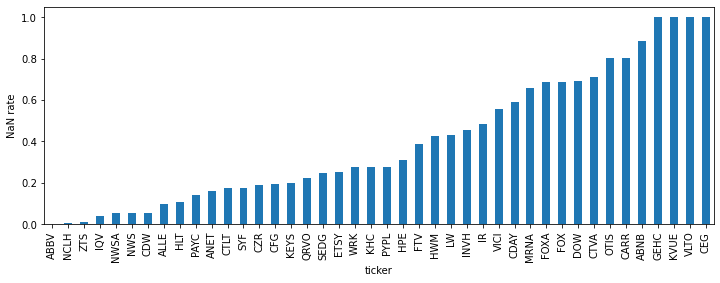

In [23]:
nanrate = move.isna().mean()
nanrate = nanrate[nanrate > 0]

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(12, 4))
    nanrate.sort_values().plot(kind='bar')
    plt.ylabel('NaN rate')
    plt.xlabel('ticker')
    plt.show()

move = move.dropna(axis=1)

#### save

In [27]:
kvecr

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2013/01/02,0.367273,-0.176484,-0.101873,0.026947,0.025696,0.244097,0.410166,0.131635,-0.124917,-0.072116,...,0.048581,0.159244,-0.047095,0.113744,-0.113937,0.162746,0.076203,-0.049626,0.058974,0.035856
2013/01/02,0.231101,0.004308,-0.099362,-0.236207,0.111897,-0.007348,0.281154,-0.124224,0.012136,0.202782,...,-0.083331,-0.001695,0.108216,0.145830,-0.044579,0.139755,0.107776,0.033324,-0.098605,-0.080036
2013/01/02,0.442315,-0.287662,0.336076,0.186372,0.299590,-0.019612,0.053006,-0.008733,-0.024864,-0.072411,...,-0.079625,0.050743,-0.074529,0.071325,-0.126362,-0.088956,0.001430,0.031557,-0.062023,-0.035642
2013/01/02,0.353092,0.101681,0.118809,-0.057101,-0.160395,0.155823,-0.169199,-0.292668,0.075328,-0.025275,...,-0.083928,-0.133427,-0.013723,-0.004647,0.132454,0.114477,-0.067168,0.185277,0.038735,-0.073583
2013/01/02,0.296903,-0.355288,0.180219,0.195444,0.067299,0.242419,-0.290258,0.052059,0.116995,-0.097665,...,-0.132678,0.065729,0.112154,0.024385,-0.103320,-0.106623,0.019190,0.074315,-0.024515,-0.007224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/12/31,0.355538,-0.065749,0.218376,0.217618,-0.255635,-0.183658,-0.012971,0.131309,-0.147249,-0.182818,...,0.186349,0.244613,0.066570,-0.051699,-0.172448,-0.005732,0.008191,0.063099,0.067809,-0.077688
2021/12/31,0.679130,0.164330,-0.461386,-0.116205,-0.075628,0.007879,0.237768,0.154901,-0.072424,-0.045067,...,0.072746,0.020725,0.023022,0.077321,0.042795,-0.042083,-0.049825,-0.016318,-0.012346,0.052859
2021/12/31,0.268395,0.139983,0.189945,0.443562,-0.184527,-0.070294,-0.121781,0.143764,-0.014463,-0.133157,...,-0.018133,-0.022724,0.029563,-0.126151,-0.031868,-0.065174,0.149842,0.089315,-0.047269,0.003063
2021/12/31,0.668312,0.033465,-0.345484,-0.182247,0.103116,0.112367,-0.073209,-0.197923,0.131299,-0.129554,...,0.000436,-0.091740,-0.072267,-0.128610,0.145684,-0.119597,-0.048031,0.048692,0.011380,-0.010380


In [28]:
vvecr

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2013/01/02,0.847456,0.113270,0.224943,-0.198804,-0.013429,0.169359,-0.018817,-0.166724,-0.142939,0.078404,...,-0.021116,0.070416,0.008883,-0.101993,0.026813,-0.022000,-0.037826,0.016092,0.042650,0.060049
2013/01/02,0.772162,0.206463,-0.136236,0.085102,0.104786,-0.158326,0.161964,-0.068102,-0.030794,0.055675,...,-0.012534,0.022287,-0.029499,0.080323,0.009458,-0.017273,0.020967,-0.062313,0.019605,-0.019182
2013/01/02,0.808261,0.049356,-0.177585,0.160844,-0.059784,0.217734,0.170071,-0.137979,0.036201,-0.040991,...,0.136974,0.058592,-0.007582,-0.056158,0.035048,-0.088247,0.012274,0.054754,0.096029,-0.039193
2013/01/02,0.793313,0.237268,0.072962,-0.255927,0.254398,-0.016488,-0.112029,0.042637,0.164568,0.021759,...,0.060985,0.029050,0.015155,0.036123,-0.010408,-0.004339,-0.075148,0.088305,-0.044835,0.075243
2013/01/02,0.773461,0.170621,-0.142260,0.091179,0.076257,-0.211637,0.226129,-0.166380,-0.032817,-0.074937,...,0.102886,0.020116,0.049145,0.021009,-0.055413,0.061574,-0.013592,0.013794,-0.052070,0.049633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/12/31,0.801978,-0.358754,-0.052893,0.157647,0.255724,0.147673,-0.020981,-0.026208,-0.096513,0.039973,...,0.083358,0.103947,-0.023677,-0.045251,-0.015225,0.002218,0.007788,-0.003115,0.011181,0.001669
2021/12/31,0.821365,-0.264213,-0.232972,-0.203161,-0.059945,0.029891,0.111419,0.075950,0.112831,0.165780,...,0.006352,-0.001293,-0.011235,0.061730,0.038278,-0.071171,0.000696,-0.020295,0.023535,-0.039419
2021/12/31,0.777411,-0.301776,-0.192090,-0.125137,0.049941,0.173920,0.216728,-0.022379,0.102980,-0.264474,...,0.040732,0.001708,0.033471,-0.076279,-0.044903,0.085008,-0.002716,0.009304,-0.006430,-0.043185
2021/12/31,0.810301,0.197717,-0.146364,0.093455,0.042101,-0.204421,0.174789,-0.156649,0.039174,-0.114233,...,0.063824,0.059250,0.011338,-0.019818,-0.013751,-0.003965,0.007726,0.019670,-0.051511,-0.002024


In [29]:
move

,AAPL,MSFT,AMZN,NVDA,GOOGL,META,GOOG,TSLA,UNH,LLY,...,WHR,CMA,HAS,VFC,ZION,DVA,RL,SEE,ALK,MHK
2013/01/02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0
2013/01/03,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2013/01/04,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,-1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2013/01/07,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0
2013/01/08,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/12/27,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2021/12/28,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2021/12/29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2021/12/30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
kvecr.iloc[:-1,:].to_csv("K_bert.csv")
vvecr.iloc[:-1,:].to_csv("V_bert.csv")
move.to_csv("Y_bert.csv")